# **Module 1 - Introduction**


Predictive models are often used by investors to decide whether a budding business would be profitable in their domain. The success of a new restaurant can be similarly predicted based on past data relating to the location and services offered. I will develop a predictor model to find out the popularity and success a new restaurant can generate with an extensive study. This study aims to offer huge insights on which factors determine the success of a new restaurant and predict ratings for newer restaurants

In [62]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [63]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [64]:
df.shape

(51717, 17)

# **Module 2 - EDA and Cleaning**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [66]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [67]:
#dropping irrelevant columns
zomato=df.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1) 

In [68]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [69]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43447 non-null  object
 1   online_order                 43447 non-null  object
 2   book_table                   43447 non-null  object
 3   rate                         43447 non-null  object
 4   votes                        43447 non-null  int64 
 5   location                     43447 non-null  object
 6   rest_type                    43447 non-null  object
 7   cuisines                     43447 non-null  object
 8   approx_cost(for two people)  43447 non-null  object
 9   listed_in(type)              43447 non-null  object
 10  listed_in(city)              43447 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [70]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city', 'rate':'rating'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [71]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43447 non-null  object 
 1   online_order  43447 non-null  object 
 2   book_table    43447 non-null  object 
 3   rating        43447 non-null  object 
 4   votes         43447 non-null  int64  
 5   location      43447 non-null  object 
 6   rest_type     43447 non-null  object 
 7   cuisines      43447 non-null  object 
 8   cost          43447 non-null  float64
 9   type          43447 non-null  object 
 10  city          43447 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [72]:
#Removing '/5' from Rates
zomato['rating'].unique()
zomato = zomato.loc[zomato.rating !='NEW']
zomato = zomato.loc[zomato.rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rating = zomato.rating.apply(remove_slash).str.strip().astype('float')
zomato['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [73]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head()

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# **Module 3 - Visualization**

**Top 10 most popular restaurant types**

Text(0.5, 0, 'count')

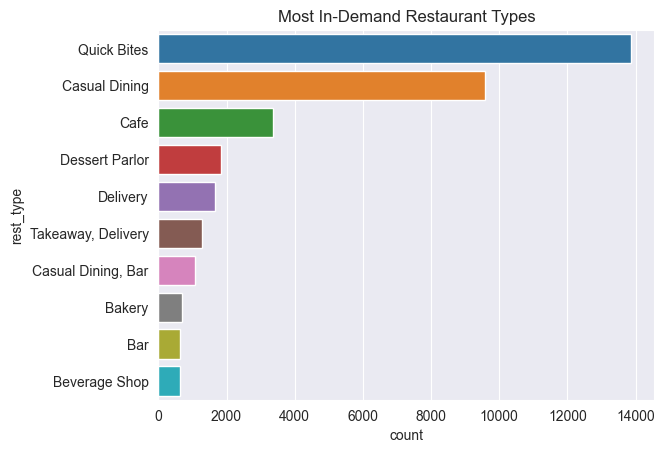

In [74]:
from collections import Counter
r_type=zomato['rest_type'].value_counts()[:10]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Most In-Demand Restaurant Types")
plt.xlabel("count")

**Proportion of Restaurants that provide online service**

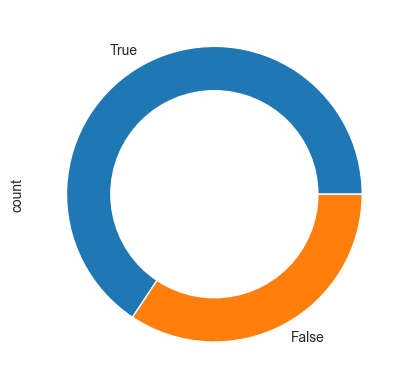

In [75]:
zomato.online_order.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

**Proportion of restaurants that allow booking tables**

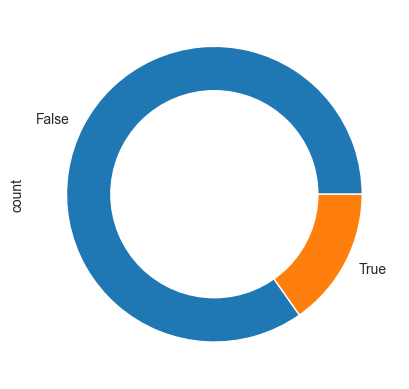

In [76]:
zomato.book_table.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

**Most popular restaurant chains**

Text(0.5, 1.0, 'Top 10 Chain Restaurants')

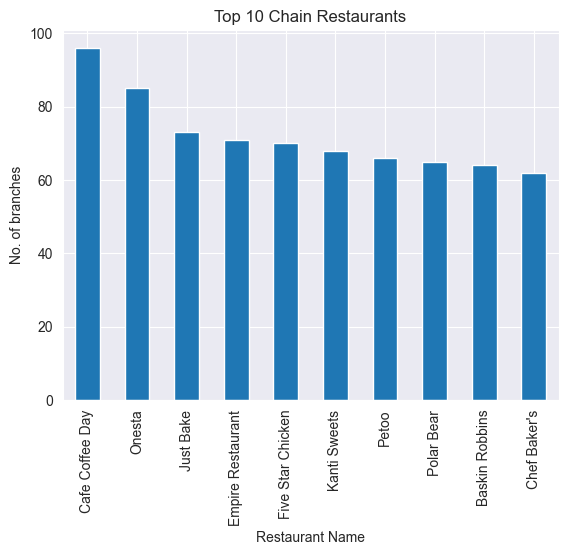

In [77]:
ax=df.name.value_counts()[:10].plot(kind='bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of branches")
plt.title("Top 10 Chain Restaurants")

**Impact of Online Ordering on Ratings**

It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings

<Axes: xlabel='rating'>

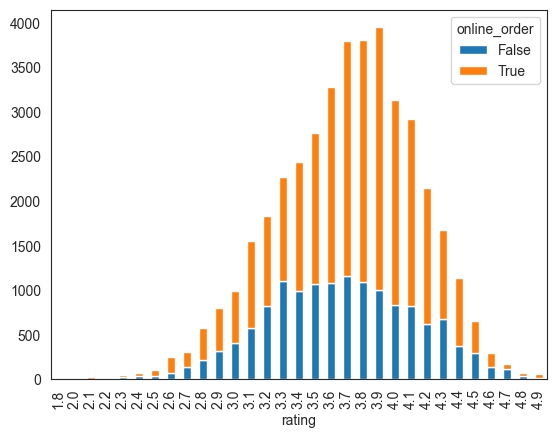

In [78]:
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.online_order)
y.plot(kind='bar',stacked=True)

**Impact of Table Booking on Ratings**

It can be seen from the chart below that restaurants that allow table bookings tend to have higher ratings.

<Axes: xlabel='rating'>

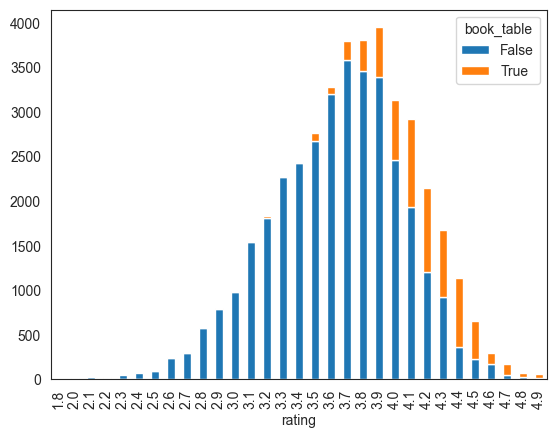

In [79]:
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.book_table)
y.plot(kind='bar',stacked=True)

**Top 10 retaurant locations**

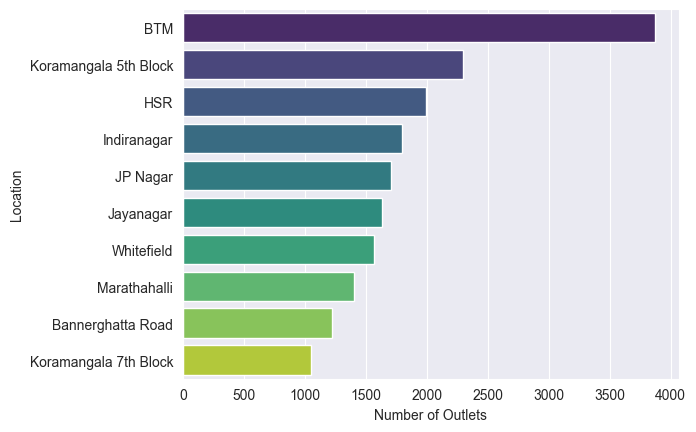

In [80]:
sns.set_style('darkgrid')
ch=zomato['location'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Number of Outlets')
plt.ylabel('Location')
plt.show()

# **Module 4 -Predictive Models**

We now proceed to build a model that can predict ratings for new restaurants on the market to enable informed decision making by the stakeholders. The first step for this is to encode the columns containing string types into some sort of code.

In [81]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rating', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

encodedZomato = Encode(zomato.copy())

Next we try to plot a heatmap to get the correlation between the various available variables

<Axes: >

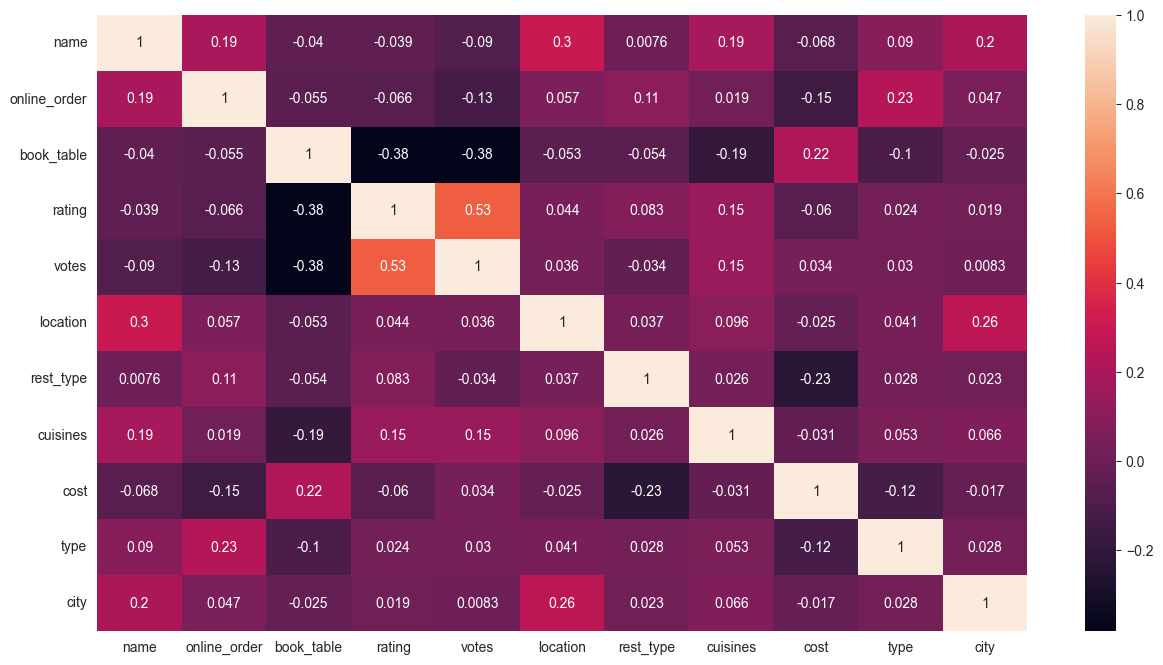

In [82]:
#Get Correlation between different variables
corr = encodedZomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

## **Splitting the Dataset**

Next up is the very important step of the deciding the train-test split for the different models. In this, after careful consideration, a train-test split of 4:1 is chosen. Also, the dependent and independent variables are declared for the models. The target variable here is rating which is what we aim to predict for future restaurants.

In [83]:
#Defining X and Y for model, Train-test split
x = encodedZomato[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y = encodedZomato['rating']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.shape, y_train.shape

((32952, 8), (32952,))

## **Extra Tree Regressor**

Extra Trees Regressor is an ensemble learning method fundamentally based on decision trees. Extra Trees Regressor, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting

For more details, visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor

In [84]:
#Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 200)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
r2_score(y_test,y_predict)

0.9317769759809151

## **Decision Tree Regressor**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For more details, visit https://scikit-learn.org/stable/modules/tree.html

also, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor

In [85]:
#DTree Regression
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.00001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.886795018310862

## **Linear Regression Model**

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression.

Visit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression

In [86]:
#Some LinReg Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.28324425364745076

## **Gradient Boosting Regressor**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

For more details, visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
r2_score(y_test,y_predict)

0.5145977180752741

## **XGBoost Regressor**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.
Visit https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbregressor#xgboost.XGBRegressor to learn more

In [88]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.9420447771178944

## **Random Forest Regressor**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor to learn more

In [89]:
from sklearn.ensemble import RandomForestRegressor
# tuning=dict()
rf=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_score(y_test,y_pred)

0.9299342258881278

Now let us compare and contrast the performance of each of our models by arranging their r-squared scores in a tabulated format

In [90]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), rf.score(x_test, y_test), ETree.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,XgBoost,0.942045
3,Extra Tree Regressor,0.931777
2,Random Forest,0.929934
1,Decision Tree,0.886795
4,Gradient Boost,0.514598
0,Linear Regression,0.283244


# **Module 5 -Inferences**

It is clearly visible that the XGBoost regressor works the best with our dataset, which means that we'll be using this model to predict the ratings of the our future dataset.

Now we need to use our model, the XGBoost regressor, to predict the ratings for new restaurants

# **Module 6 - Predicting Ratings for New Restaurants**

In [91]:
df_new = pd.read_csv('data_for_predictions.csv')
#Converting cost to float
df_new['cost'] = df_new['cost'].astype(float)
df_new

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet,Banashankari
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet,Banashankari
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet,J P Nagar
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet,J P Nagar
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out,Bannerghatta Road
5,Lombard,False,True,35,Jayanagar,Casual Dining,"Italian, Spanish",900.0,Buffet,Jayanagar
6,Xi Jumping!,True,True,69,Banashankari,"Casual Dining, Takeaway, Delivery","Chinese, Fast Food",200.0,Buffet,Banashankari
7,Andhra Gunpowder,True,True,975,Indiranagar,"Casual Dining, Takeaway, Delivery",Andhra,400.0,Buffet,Banashankari
8,Punjabi Nawabi,True,False,99,Indiranagar,"Casual Dining, Delivery","North Indian, Mughlai, Biryani",300.0,Buffet,Banashankari
9,Lo! - Low Carb and Keto Foods,True,False,333,Domlur,"Takeaway, Delivery","Rolls, American, Healthy Food",400.0,Delivery,Indiranagar


In [92]:
zomatoNew = Encode(df_new.copy())
zomatoNew

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city
0,0,0,0,400,0,0,0,400.0,0,0
1,1,0,0,291,0,1,1,690.0,0,0
2,2,0,1,1279,1,2,2,420.0,0,1
3,3,1,0,705,1,1,3,239.0,0,1
4,4,1,1,200,2,3,4,1000.0,1,2
5,5,1,1,35,3,1,5,900.0,0,3
6,6,0,1,69,0,0,6,200.0,0,0
7,7,0,1,975,4,0,7,400.0,0,0
8,8,0,0,99,4,2,8,300.0,0,0
9,9,0,0,333,5,4,9,400.0,2,4


In [93]:

x_pred = zomatoNew[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y_predict=xgb.predict(x_pred)
y_pred_list = [ round(elem, 1) for elem in y_predict ]
y_pred_list

[3.9, 3.9, 4.2, 3.9, 4.0, 3.2, 3.6, 3.8, 3.7, 4.2]

In [94]:
df_new["rating"] = y_pred_list
df_new

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city,rating
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet,Banashankari,3.9
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet,Banashankari,3.9
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet,J P Nagar,4.2
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet,J P Nagar,3.9
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out,Bannerghatta Road,4.0
5,Lombard,False,True,35,Jayanagar,Casual Dining,"Italian, Spanish",900.0,Buffet,Jayanagar,3.2
6,Xi Jumping!,True,True,69,Banashankari,"Casual Dining, Takeaway, Delivery","Chinese, Fast Food",200.0,Buffet,Banashankari,3.6
7,Andhra Gunpowder,True,True,975,Indiranagar,"Casual Dining, Takeaway, Delivery",Andhra,400.0,Buffet,Banashankari,3.8
8,Punjabi Nawabi,True,False,99,Indiranagar,"Casual Dining, Delivery","North Indian, Mughlai, Biryani",300.0,Buffet,Banashankari,3.7
9,Lo! - Low Carb and Keto Foods,True,False,333,Domlur,"Takeaway, Delivery","Rolls, American, Healthy Food",400.0,Delivery,Indiranagar,4.2


In [95]:
df_new.to_csv('predicted_ratings.csv', index = False)

# **Module 7 - Conclusions**

We have successfully trained and built multiple models on the dataset. We also found that the XGBoost regressor works incredibly well for this data. This analysis shows that once the model has been trained and tested on the data, we can actually predict the ratings for new restaurants as well with the independent variables being available to us.